### ДЗ_14 Бернатович 16.11.2022
Проанализировать данные по выживаемости. Обучить модель предсказания выживет ли человек или нет (ключевая переменная) (различные варианты визуализации можно посмотреть здесь https://www.kaggle.com/competitions/titanic/code?competitionId=3136&sortBy=scoreDescending&language=Python).
Определить наиболее значимые переменные которые влияют на выживаемость. 
Визуализировать дерево решений. 
Написать вывод. 
Не копировать бездумно чужие работы. 


Ответить на вопросы (обоснованно).

1. Как влияет размер семьи  на вероятность виживаемости (одинокие выживают чаще или нет?, люди у которых большая семья (больше 4) выживают чаще или нет).
2. Как влияет пол/возраст/номер палубы.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
os.chdir("C:\\Users\\Катя")
os.getcwd()

'C:\\Users\\Катя'

In [3]:
df_test = pd.read_csv('titanic_test.csv')
df_train = pd.read_csv('titanic_train.csv')

In [4]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
df_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:xlabel='Survived', ylabel='count'>

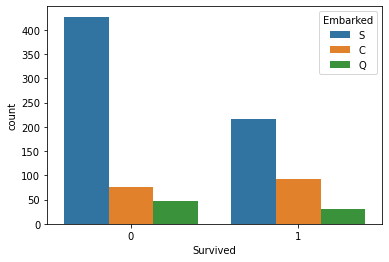

In [6]:
sns.countplot(x='Survived', hue='Embarked', data=df_train) 

<AxesSubplot:xlabel='Survived', ylabel='count'>

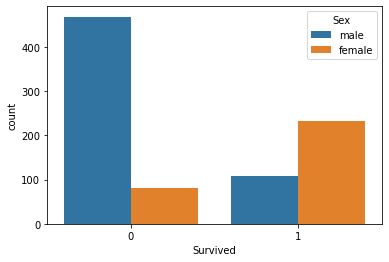

In [7]:
sns.countplot(x='Survived', hue='Sex', data=df_train) 

<AxesSubplot:xlabel='Survived', ylabel='count'>

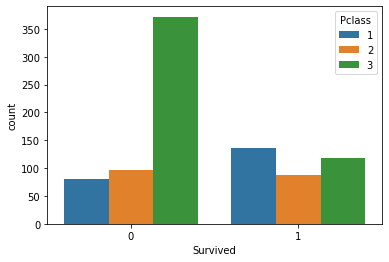

In [8]:
sns.countplot(x='Survived', hue='Pclass', data=df_train)


<AxesSubplot:xlabel='Survived', ylabel='count'>

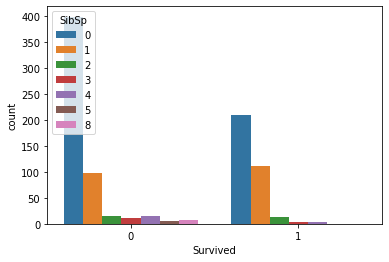

In [9]:
sns.countplot(x='Survived', hue='SibSp', data=df_train) 

<AxesSubplot:xlabel='Survived', ylabel='count'>

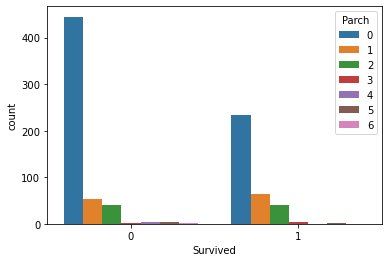

In [10]:
sns.countplot(x='Survived', hue='Parch', data=df_train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

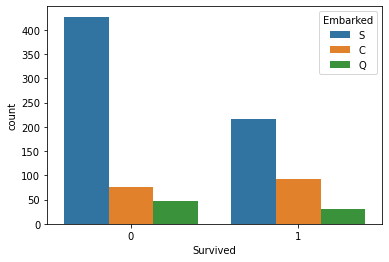

In [11]:
sns.countplot(x='Survived', hue='Embarked', data=df_train) 

In [12]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

#### Отсутствующие значения

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
df_train.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [16]:
df_train.drop('PassengerId', axis=1, inplace=True)
df_train.drop('Name', axis=1, inplace=True)
df_train.drop('Ticket', axis=1, inplace=True)

In [17]:
#Cabin уберем, много пропусков
df_train.drop('Cabin', axis=1, inplace=True)

In [18]:
df_train['Age'].median()

28.0

In [19]:
#возраст и выживаемост не сильно связаны (см.табл.корреляции), заменим медианным значением пропуски
df_train['Age']=df_train['Age'].fillna(df_train['Age'].median())

In [20]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [21]:
#Пунк отправления заменим на самый частовстречающийся
df_train['Embarked']=df_train['Embarked'].fillna('S')

In [22]:
df_train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [23]:
df_train.groupby('Pclass').mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,36.812130,0.416667,0.356481,84.154687
2,0.472826,29.765380,0.402174,0.380435,20.662183
3,0.242363,25.932627,0.615071,0.393075,13.675550


In [24]:
df_train.groupby(['Pclass','Sex']).mean()

Survived        Age     SibSp     Parch        Fare
Pclass Sex                                                        
1      female  0.968085  33.978723  0.553191  0.457447  106.125798
       male    0.368852  38.995246  0.311475  0.278689   67.226127
2      female  0.921053  28.703947  0.486842  0.605263   21.970121
       male    0.157407  30.512315  0.342593  0.222222   19.741782
3      female  0.500000  23.572917  0.895833  0.798611   16.118810
       male    0.135447  26.911873  0.498559  0.224784   12.661633

In [25]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


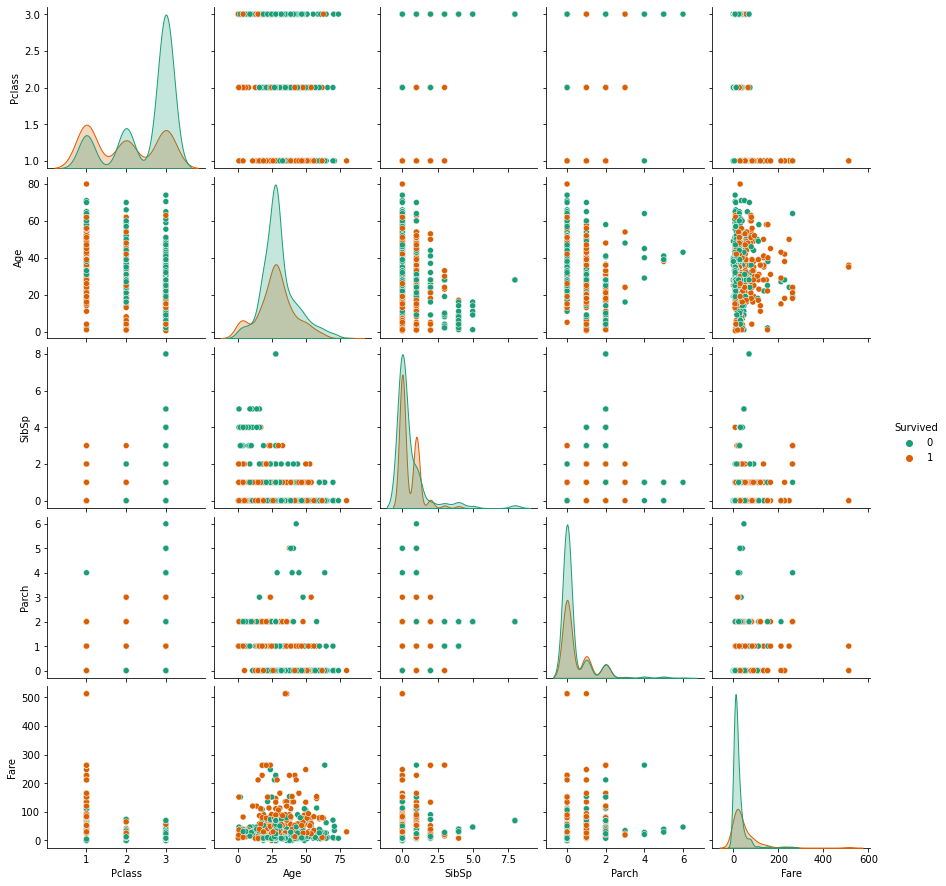

In [26]:
sns.pairplot(df_train,hue='Survived',palette='Dark2')

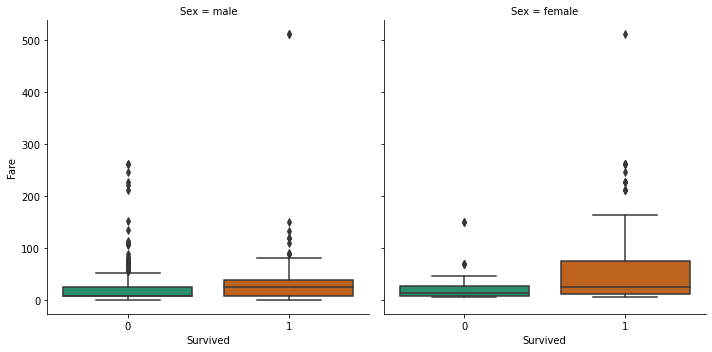

In [27]:
sns.catplot(x='Survived',y='Fare',data=df_train,kind='box',col='Sex',palette='Dark2')

Построение признаков

In [28]:
pd.get_dummies(df_train)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,3,28.0,1,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0


In [29]:
pd.get_dummies(df_train.drop('Survived',axis=1),drop_first=True)

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,1
887,1,19.0,0,0,30.0000,0,0,1
888,3,28.0,1,2,23.4500,0,0,1
889,1,26.0,0,0,30.0000,1,0,0


Разбиение на обучающий и тестовый наборы данных

In [30]:
X = pd.get_dummies(df_train.drop('Survived',axis=1),drop_first=True)
y = df_train['Survived']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Классификатор "Дерево решений" - Decision Tree Classifier
Гиперпараметры по умолчанию

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
model = DecisionTreeClassifier()

In [35]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [36]:
base_pred = model.predict(X_test)

Оценка работы модели

In [37]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [38]:
confusion_matrix(y_test,base_pred)

array([[133,  21],
       [ 40,  74]], dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


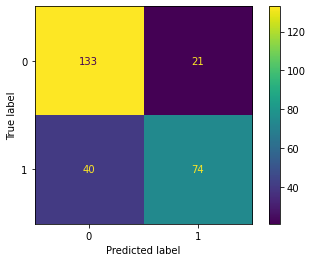

In [39]:
plot_confusion_matrix(model,X_test,y_test)

In [40]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       154
           1       0.78      0.65      0.71       114

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



In [41]:
model.feature_importances_

array([0.10071355, 0.2417812 , 0.01525594, 0.03322541, 0.2528189 ,
       0.32541422, 0.00362384, 0.02716695])

In [42]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
Pclass,0.100714
Age,0.241781
SibSp,0.015256
Parch,0.033225
Fare,0.252819
Sex_male,0.325414
Embarked_Q,0.003624
Embarked_S,0.027167


Визуализация дерева

In [43]:
from sklearn.tree import plot_tree

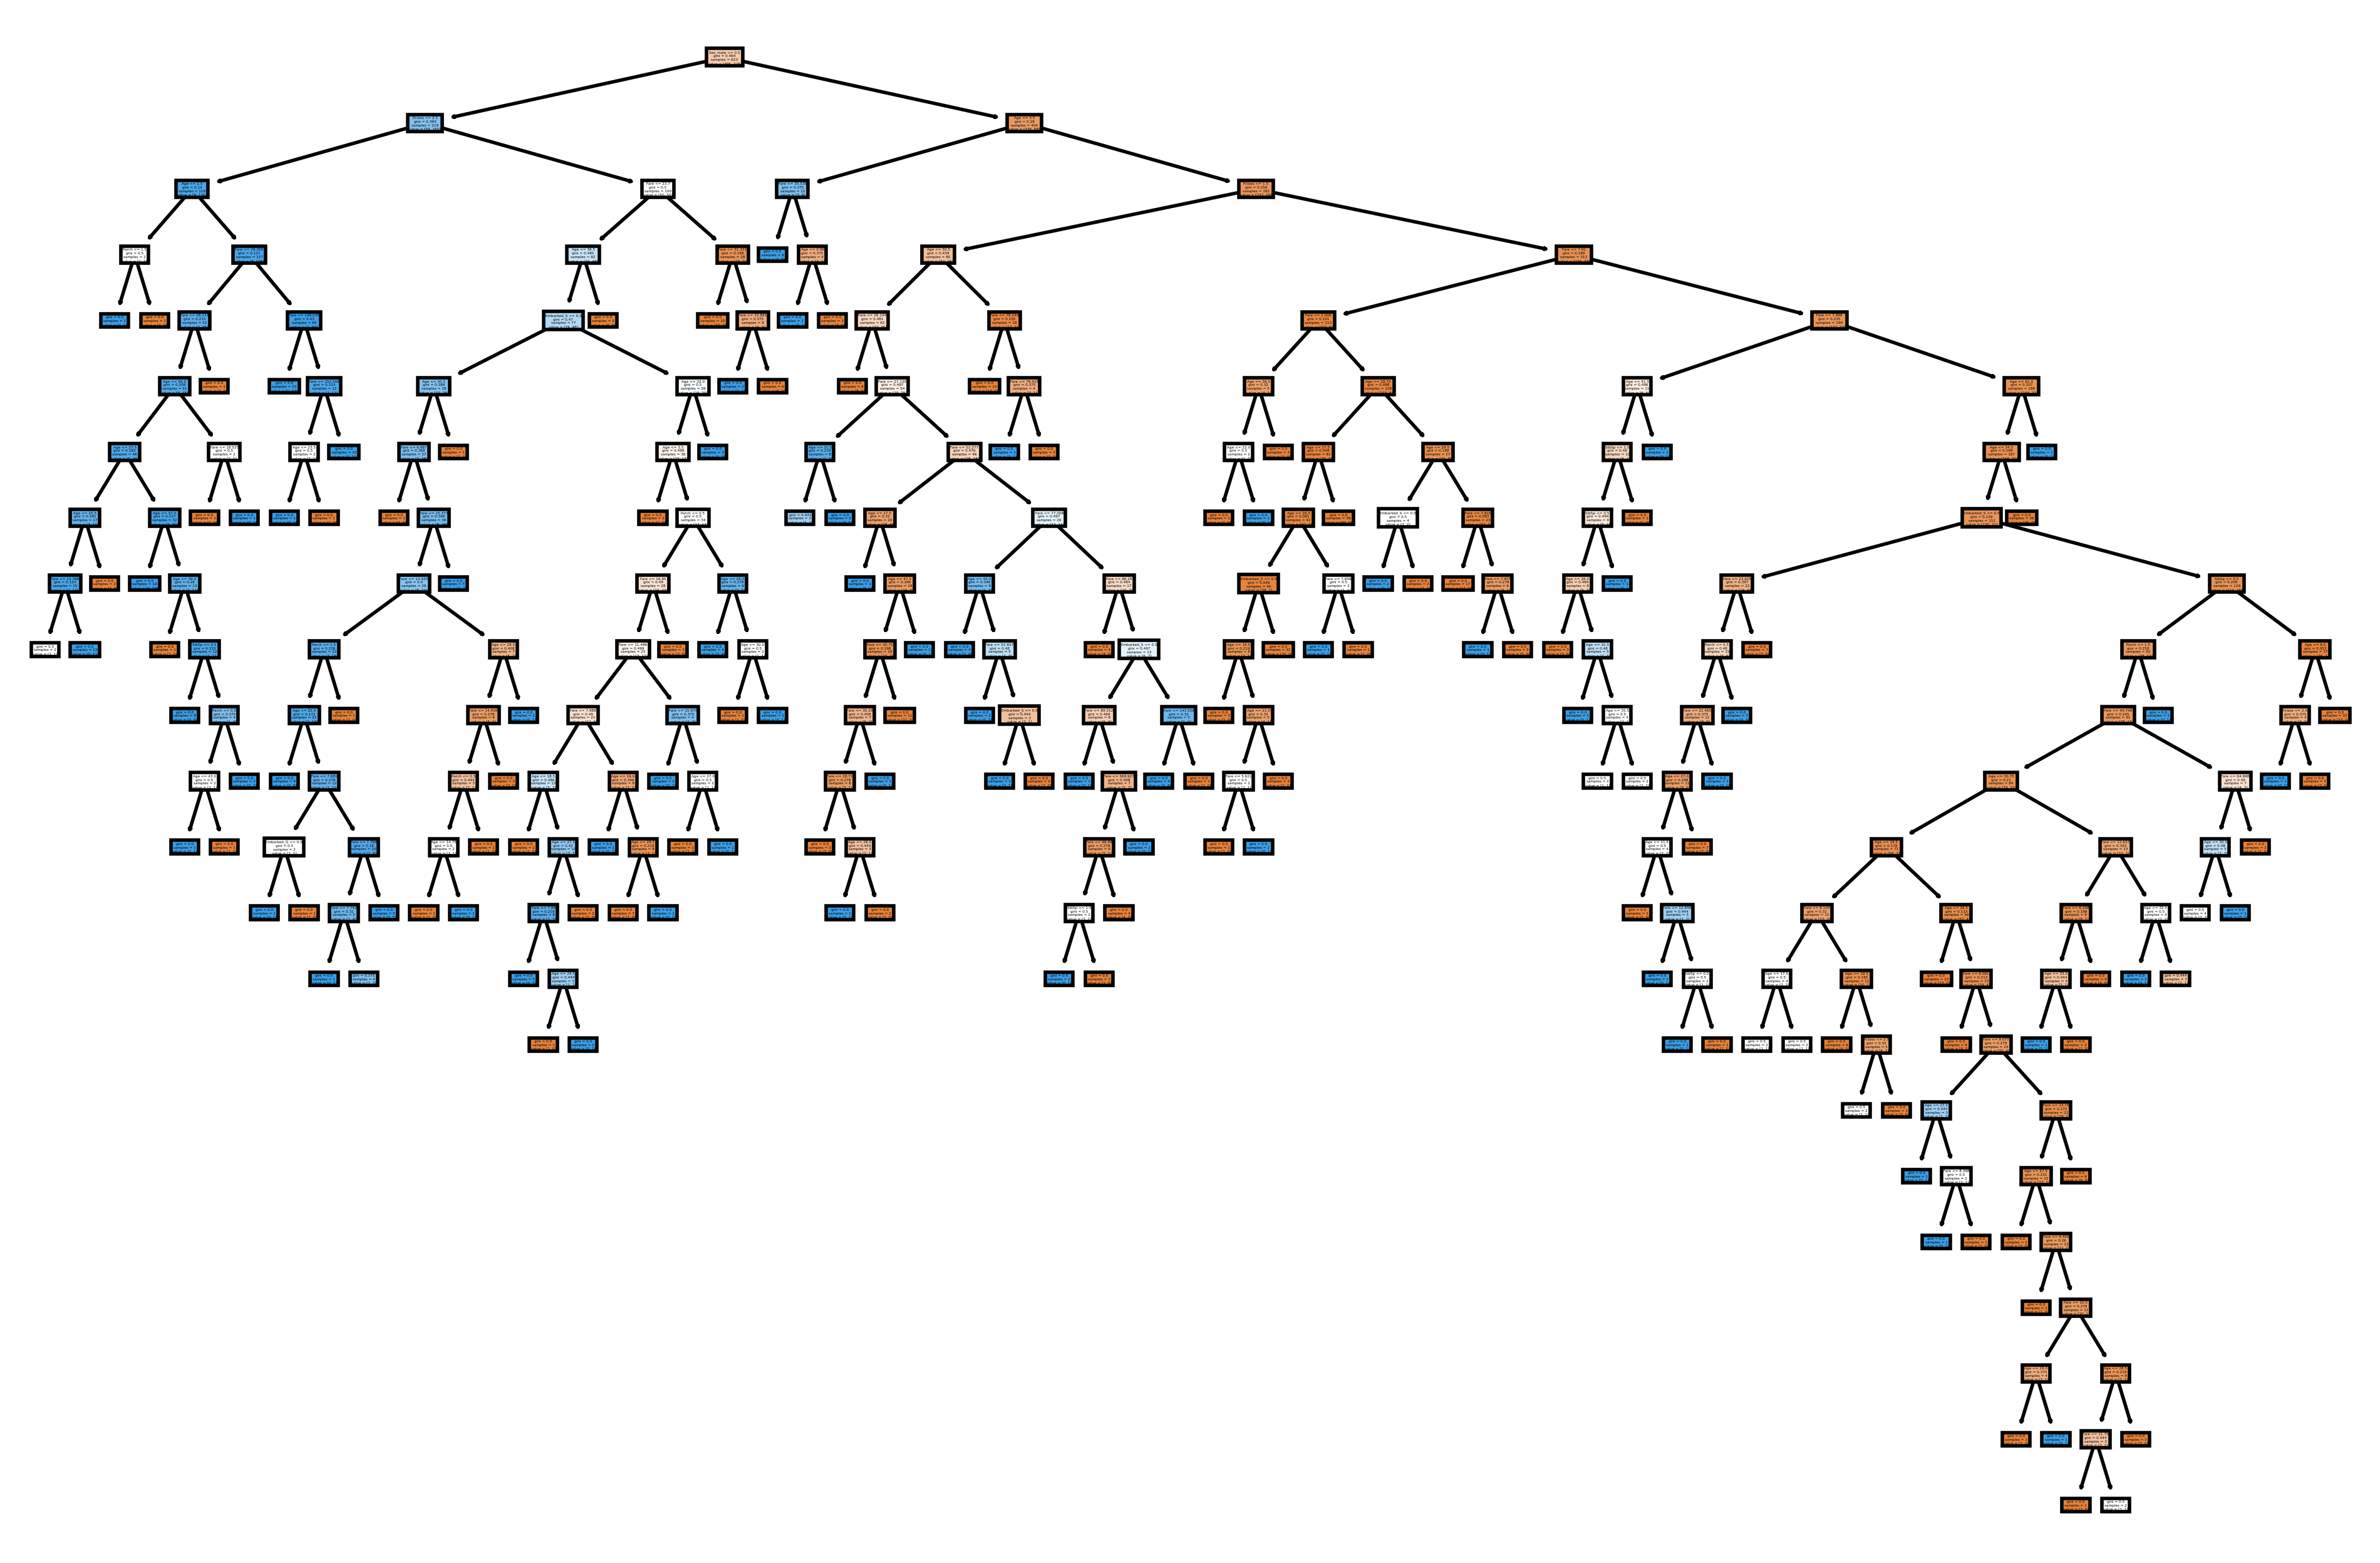

In [44]:
plt.figure(figsize=(12,8),dpi=400)
plot_tree(model,filled=True,feature_names=X.columns);

##### Результаты модели: создадим функцию, которая возвращает результаты классификации и рисует дерево

In [45]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=X.columns);

Гиперпараметр "Max Depth"

In [46]:
pruned_tree = DecisionTreeClassifier(max_depth=4)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

              precision    recall  f1-score   support

           0       0.78      0.90      0.83       154
           1       0.82      0.66      0.73       114

    accuracy                           0.79       268
   macro avg       0.80      0.78      0.78       268
weighted avg       0.80      0.79      0.79       268



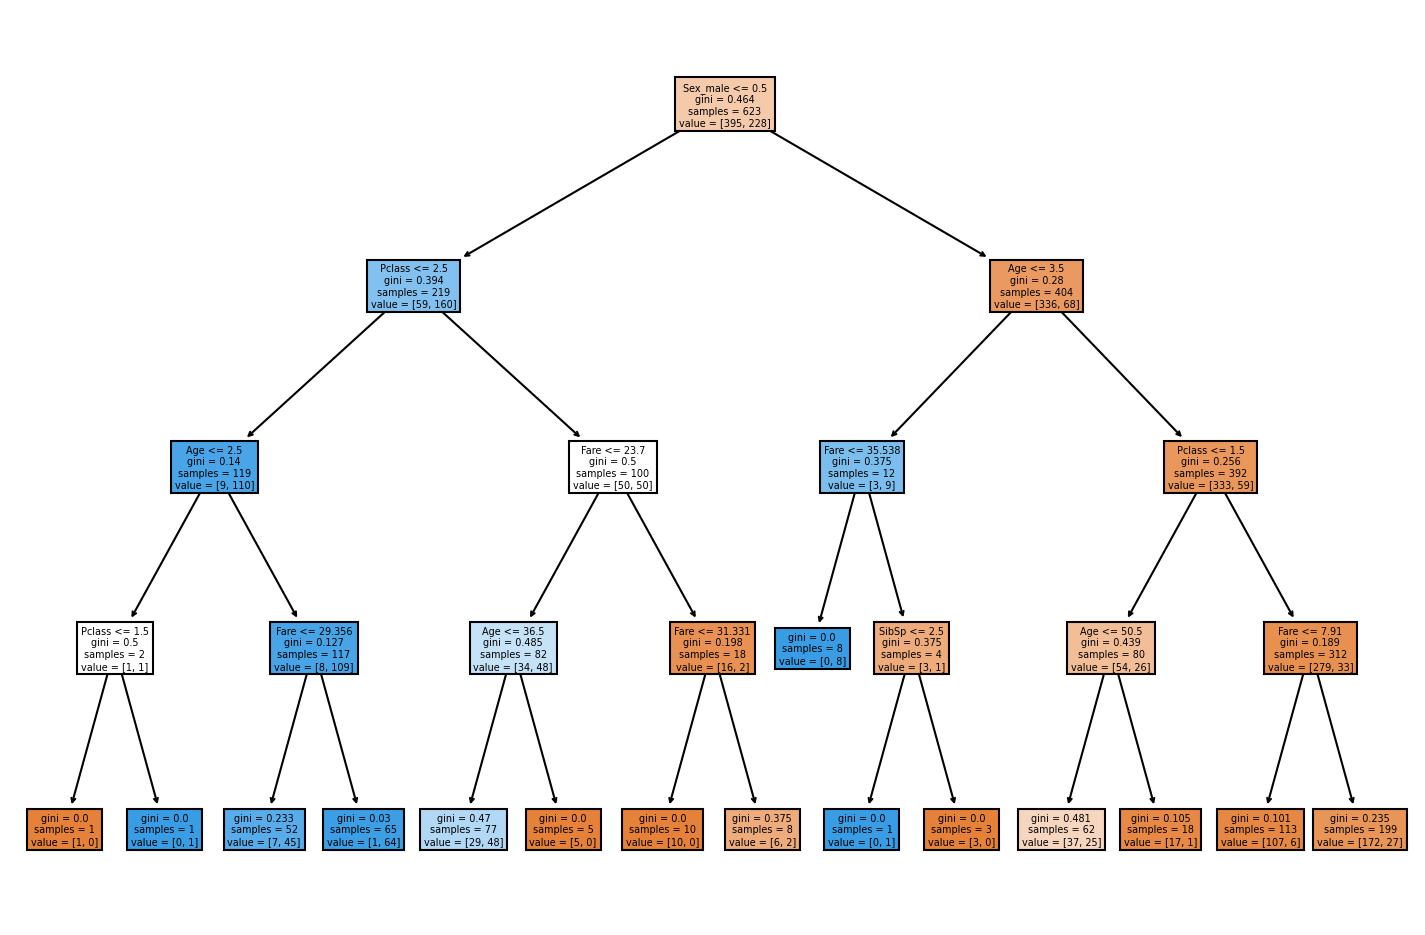

In [47]:
report_model(pruned_tree)

Гиперпараметр "Max Leaf Nodes"

In [48]:
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=10)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=10)

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       154
           1       0.84      0.66      0.74       114

    accuracy                           0.80       268
   macro avg       0.81      0.78      0.79       268
weighted avg       0.81      0.80      0.80       268



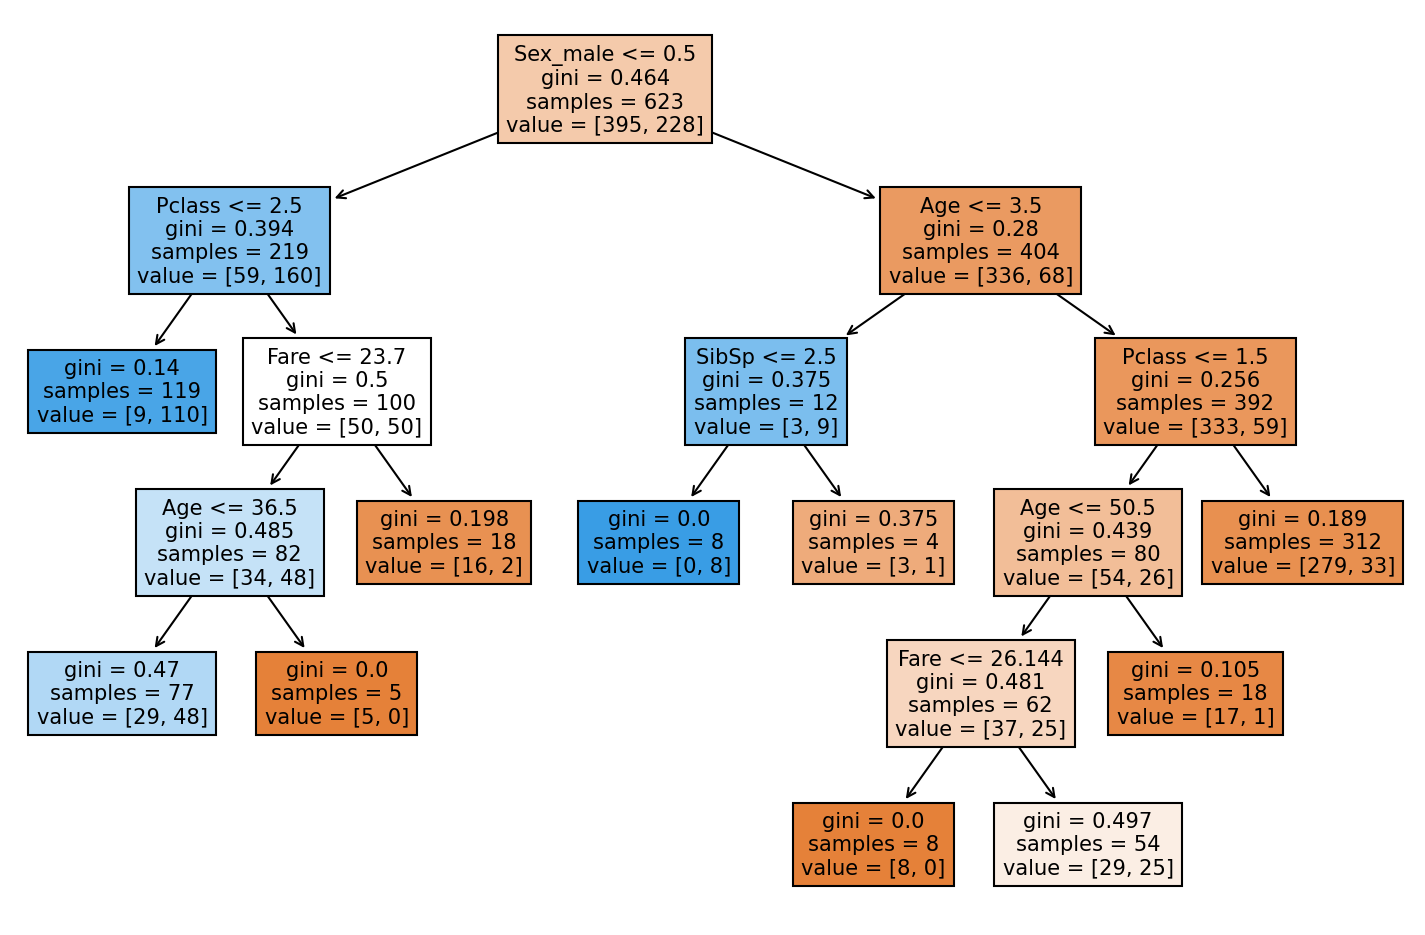

In [49]:
report_model(pruned_tree)

Гиперпараметр "Criterion"

In [50]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       154
           1       0.80      0.71      0.75       114

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



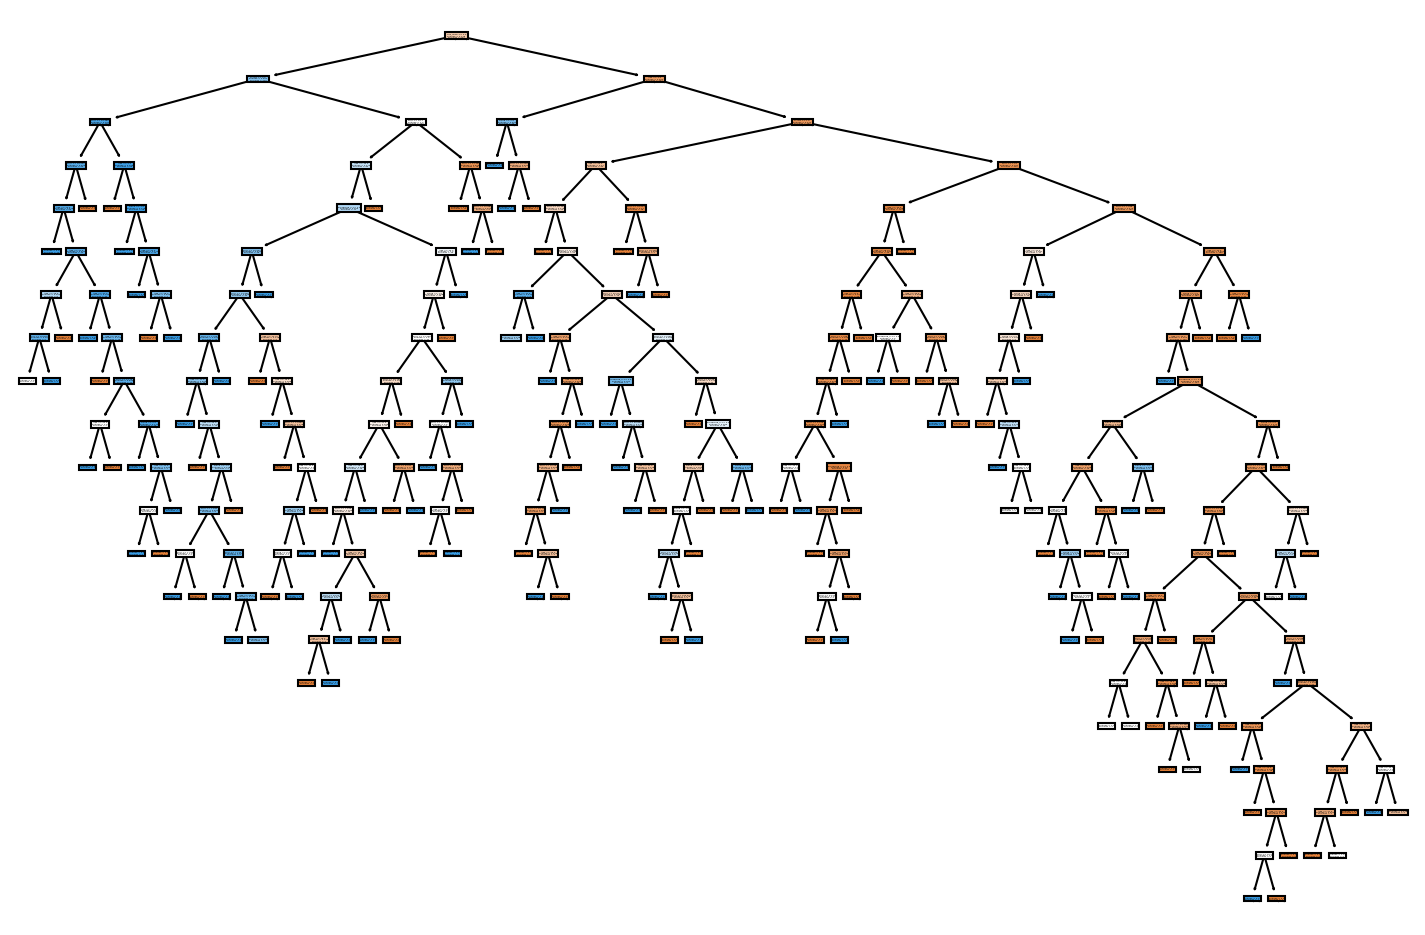

In [51]:
report_model(entropy_tree)

### Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
# Используем 10 случайных деревьев
model = RandomForestClassifier(n_estimators=10,max_features='auto',random_state=101)

In [54]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [55]:
preds = model.predict(X_test)

Оценка работы модели

In [56]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,accuracy_score

In [57]:
confusion_matrix(y_test,preds)

array([[140,  14],
       [ 43,  71]], dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


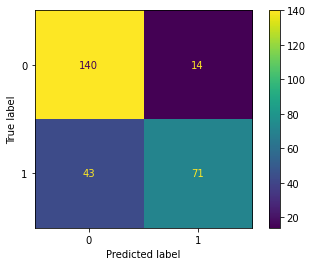

In [58]:
plot_confusion_matrix(model,X_test,y_test)

Важность признаков

In [59]:
model.feature_importances_

array([0.07217079, 0.25428278, 0.05224932, 0.03977565, 0.2827391 ,
       0.26630923, 0.00692969, 0.02554344])

Выберем правильное количество деревьев


проверим, приведёт ли добавление дополнительных деревьев к улучшению производительности...

In [60]:
test_error = []

for n in range(1,40):
    # Используем n случайных деревьев
    model = RandomForestClassifier(n_estimators=n,max_features='auto')
    model.fit(X_train,y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds,y_test))
 

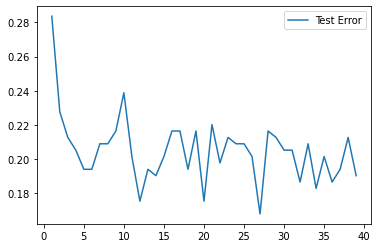

In [61]:
plt.plot(range(1,40),test_error,label='Test Error')
plt.legend()

Здесь видно, что мы получаем всё меньше пользы при добавлении дополнительных деревьев. Для такого  набора данных возьмем примерно 10 деревьев.

1. Из 891 пассажира выживает 342 человека
2. Женщин выживает больше, чем мужчин
3. 1 и 2 класс выживает лучше,чем 3 класс.
4. Пассажиры-одиночки выживают лучше, чем пассажиры с компанией (SibSp или Parch)
5. У пассажиров из пункта S выживаемость лучше, чем из C и Q.